<a href="https://colab.research.google.com/github/SotaYoshida/Lecture_DataScience/blob/2021/notebooks/Python_chapter4_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ライブラリ/パッケージ/モジュールとデータの可視化(Matplotlib)

[この章の目的]
* [ライブラリ]という概念の獲得
* Pythonを用いた各種プロットをやってみる

Pythonでは(他のプログラミング言語と同様)  
特定の作業がパッケージ化されたプログラム群が用意されていて、  
これらをライブラリ,パッケージ,モジュールなどと呼びます
> 授業では、ライブラリ,モジュール,パッケージという名前が混在しているかと思います。  
正確な定義としてはライブラリ/パッケージ/モジュールの順に、  
より上位の集合を指すようですが、境界はあいまいな印象です。  

Pythonのライブラリの多くはGitHub上で開発・公開されていて、  
簡単にインストールしたりインポートして使うことができます。  

データ分析, AI・機械学習, エクセル等の操作, Webスクレイピングなど  
非常に多岐にわたるモジュールが存在していて誰でも気軽に使うことができます。

幾つかのライブラリやモジュールは標準で組み込まれているため、  
インストール作業をすることなく、  
以下のように簡単にインポートして使うことができます。  
たとえばmathという名前のモジュールをインポートする際には


In [ ]:
import math

とします。簡単ですね。
  
上でmathをインポートすると、数学で多用される$\pi$,対数関数```log(),log10()```  
指数関数```exp```,三角関数```sin,cos```などを使うことができます。

モジュール内に用意されている関数を利用するときは通常  
```モジュール名.関数```や```モジュール名.関数(引数)```といった形で使います。

In [ ]:
print(math.log(2.0)) #自然対数 
print(math.log10(2.0)) #常用(底が10)対数
print(math.exp(2.0)) #指数関数
print(math.pi) #円周率pi (引数なし)
print(math.sin(math.pi))  # sin(pi)

0.6931471805599453
0.3010299956639812
7.38905609893065
3.141592653589793
1.2246467991473532e-16


注:sin(π)は厳密に0になるべきですが1章で述べたように、  
実数が有限の精度なので微小な量0からずれています

## Numpy

データ分析などで非常によく使われるNumpyというライブラリがあります。

簡単な作業ならリストでも代用できるので必須ではありませんが  
コードを大幅に簡略化することができるので  
今後ノートブックでもたびたびNumpyが用いられます。

詳しくは[こちらのノートブック](https://colab.research.google.com/github/SotaYoshida/Lecture_DataScience/blob/2021/notebooks/Python_misc_numpy.ipynb)を参照してください.

## Python(Matplotlib)を用いた作図



以降ではMatplotlibと呼ばれるモジュールを使って、  
各種のグラフを作成する方法を見ていきましょう.

Matplotlibは様々なグラフが描ける一方で少々テクニカルな部分が多いので  
**細かい部分は分からなくても心配は不要です**  
「こういうおまじないを唱える(書くと)こうなる」  
というざっくりとした理解でまずは大丈夫です。  

はじめはネットに転がっている誰かが書いたコードを少しずつ流用し、  
自分の目的のためにどうすれば良いか類推しながら改良していって、  
自分の描きたいグラフに近づけていくのが良いでしょう。  
(私もよく過去の自分が作成したコードを流用して作図しています)

慣れてくるといろんな図を作ったり、細かいところにこだわったりしたくなります。  
そんなときは以下のチートシートが役に立ちます.  
https://github.com/matplotlib/cheatsheets  




まず、以下のコードを実行して、matplotlib内のpyplotをインポートします

matplot.pyplotだと名前が長いので```plt```という名前で使えるようにしています   
そのためには```import XXX as YY``` などとします

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
from matplotlib import pyplot as plt #でも同じ

いくつかのライブラリにはディレクトリのように

LibraryA  
├ module1.py  
│   └─ sub_module1_1.py   
│   └─ sub_module1_2.py  
├ module2.py  
︙  

という階層構造があり"子"はピリオドで指定します.  
上の```matplotlib.pyplot```はその一例です.

次に、Matplotlibは標準だと日本がは文字化けして豆腐のように表示されてしまうので、  
日本語フォントを使うためのライブラリをGoogleのサーバにインストールします

In [ ]:
!pip install japanize-matplotlib 
import japanize_matplotlib
import numpy as np  #ついでにコレもインポート

     |████████████████████████████████| 4.1 MB 13.9 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=98e7f1a2f90a2e998c7343b4ece95ea7b5c958187f3de5a105373c80c3b27f08
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


Pythonでグラフを作る際の基本は、  
**データ(描画したいもの)が入ったリストを作ること**です。

リストに対して、線や棒、いろんな形のシンボルを描いたりして、  
どんどんグラフを構成する要素を足しながら、   
それらの色や線種、透過度や太さ,背景色などを変えつつ  
徐々に望むようなグラフにしていきます。

以下では代表的なグラフを例に、Matplotlibを使った作画を試してみましょう。

### 棒グラフ

Aさんの共通試験の得点をリスト(括弧[ ]内に、数字カンマで区切る)に格納します。  
順番(各科目の名前(ラベル))は、国語,英語,数IA,数IIB,化学,物理,世界史として...  

In [ ]:
data = [152, 170, 82,85,79,92,88]
label = ["国語","英語", "数IA", "数IIB", "化学", "物理", "世界史"]
total = sum(data)
print("合計得点は", total, "点で、得点率は"+str("%6.1f" % (100* total/900))+"%です")
#print("合計得点は", total, "点で、得点率は"+str(total/900)+"%です")

合計得点は 748 点で、得点率は  83.1%です


Aさん優秀ですね。これを棒グラフにでもしてみましょう。

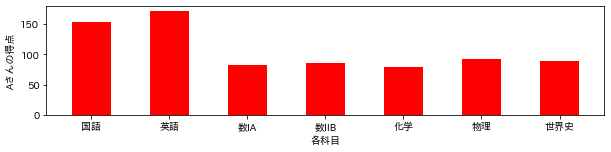

In [ ]:
plt.figure( figsize=(10,2) ) 
plt.bar(label,data,align='center',width=0.5,color="red") 
plt.xlabel("各科目"); plt.ylabel("Aさんの得点") 
plt.show() 
plt.close()

棒グラフが描けたでしょうか。それぞれの行の意味を順に説明します。  

* 1行目:  
```plt.figure(figsize=(10,2))  ```  
ここでは、matplotlib.pyplot内のfigureという関数を読んでいます。  
図を描くキャンバスを用意しているようなイメージです。  
上でmatplotlibモジュール内のpyplotというモジュールを  
pltという名前でインポートしたのでplt.figureというのは、  
pyplot内のfigureという関数を使うことを意味します。  
ここでは```figsize=(10,2)```という引数を指定しました。  
(指定しなければ自動で図のサイズが決まります)  
figsize=(横,縦)で大きさが指定できます、figsizeを変えて試してみましょう  

* 2行目:  
```plt.bar(label,data,align='center',width=0.5,color="red")```  
pyplot内のbarという関数(棒グラフを描く関数)を使っています。  
1つめの引数はx軸上の値で、2つめはy軸に対応する値です。  
x軸用のリストが数値以外のときは整数値を割り当ててプロットしてくれます  
(７個データがあれば、x=0,1,...,6に割り当てられる)

* 3行目:  
```plt.xlabel("各科目"); plt.ylabel("Aさんの得点")  ```  
ここではx軸とy軸のデータの種類(ラベル/labelと呼ぶ)を指定しています。  

* 4行目:  
```plt.show()```  
それまでに指定した条件で絵を描いて表示する

* 5行目:  
```plt.close()  ```キャンバスを閉じる。  
とくに一つのプログラムで複数絵を描くときはこれを書きましょう。  
(closeしないと、どこまでがどのグラフのための指示かわからず  
意図しない絵になることがあります)

####  **練習**   
国語と英語の得点を100点満点に換算し、  
いくつかの得点や棒グラフの色を変えてプロットしてみましょう。




---



### 円グラフ

世の中には多くの円グラフの誤用が溢れています。  
ワイドショーなどで総和が100%になっていなかったり、  
円に対して占める割合が明らかに間違っていたりと、ひどい有様です。  

他にも、奥行方向に傾いた円グラフも誤った印象を与えます。  
このように、円グラフというのは作成する際に注意が必要ですし、  
作成した円グラフがおかしいと「私は教養のない人です」  
と言っているようなもので大変恥ずかしい思いをします。  

そもそも円グラフにしなきゃいけないデータってあるんでしょうか？  
帯グラフなどのほうがよっぽど量の比較にも向いています。

あれ...無くない？ということで円グラフはオマケとします。

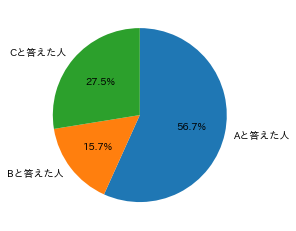

In [ ]:
#どうしても円グラフが描きたい方へ (下のコードを適当にいじって遊んでみてください)
tlabels = ["Aと答えた人","Bと答えた人","Cと答えた人"]
ratio = [513,142, 249]

plt.figure(figsize=(4,4)) 
plt.pie(ratio,labels=tlabels,counterclock=False, startangle=90,autopct="%.1f%%")
plt.show()
plt.close() 
# labels=tlabelsは、 pie()関数の中のlabelsという引数にtlabelsを突っ込むという意味
# label(ラベル)とは、凡例(legend)のこと。それぞれのオブジェクトが何を指すのか
# counterclockは反時計回りのオプションをFalse(偽)とするのでつまり時計回り(回りくどいな...)
# startangleは円グラフの始点を、x軸から見て何度のところにとるかで、今は90度(つまり12時の方向)と設定.
# autopctは「値を%表記に直せ」というオプションで、 %.1f%%は小数点以下1桁まで出力しなさいという命令.

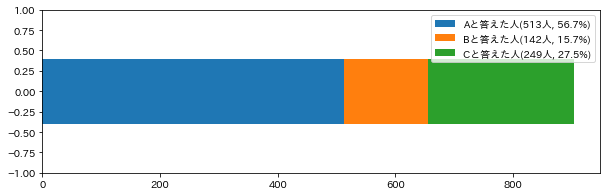

In [ ]:
tlabels = ["Aと答えた人","Bと答えた人","Cと答えた人"]
ratio = [513,142, 249]

plt.figure(figsize=(10,3)) 
plt.ylim([-1,1]) #plt.ylim(-1,1)でも可
xs = 0.0
for i in range(len(tlabels)):
    tx = ratio[i]
    ty = 0.0
    plt.barh([ty],width=tx,left=xs,label=tlabels[i]+"("+str(ratio[i])+"人, "+str("%4.1f" % (100*ratio[i]/sum(ratio)))+"%)")
    xs += ratio[i]
plt.legend()
plt.show()
plt.close()

こっちの棒グラフのほうが良い気がする

### plot: 線の描画

説明変数$x$と目的変数$y$があって、  
とくに**$x$に対する$y$の振る舞い**に興味がある場合には```plot```を使います。

たとえば、日付($x$)に対するコロナウイルス感染者($y$)の推移をプロットしてみましょう。

日付は、WHOのSituation Reportが初めて発表された  
1月20日を起点(ゼロ)とする経過日数として表すことにして...





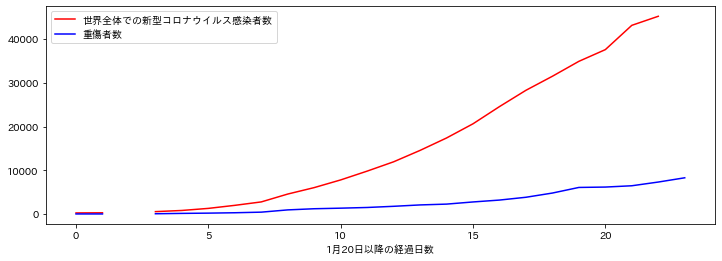

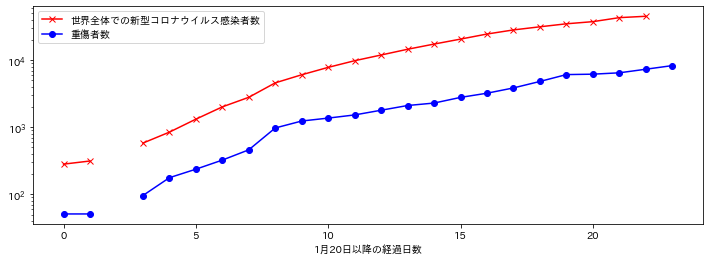

In [ ]:
# 感染者数と重傷者数
y= [282,314,None,581,846,1320,2014,2798,4593,
    6065,7818,9826,11953,14557,17391,20630,
    24554,28276,31481,34886,
     37558.40554,43103,45171] #2月13日までのデータ

y_err= [282,314,None,581,846,1320,2014,2798,4593,
    6065,7818,9826,11953,14557,17391,20630,
    24554,28276,31481,34886,35000,
     37558.40554,43103,45171] #2月13日までのデータ

y_sev=[51,51,None,96,177,237,324,461,976,1239,
       1370,1527,1795,2110,2296,2788,3219,3859,4821,6101,6188,6484,7333,8304]

plt.figure(figsize=(12,4)) 
plt.xlabel("1月20日以降の経過日数")
plt.plot(range(len(y)),y, label="世界全体での新型コロナウイルス感染者数",color="red")
#x軸が0から始まる整数値(0,1,...)で良い場合は、x軸のデータを指定しなくてもplotしてくれる
plt.plot(y_sev, label="重傷者数",color="blue") 
plt.legend() ##凡例(線や点等の説明)を描画する
plt.show()
plt.close() 

plt.figure(figsize=(12,4)) 
plt.xlabel("1月20日以降の経過日数")
plt.yscale("log") ## y軸を対数スケールに変換
plt.plot(range(len(y)), y, marker="x",label="世界全体での新型コロナウイルス感染者数",color="red") ## markerの値を指定すれば、線だけじゃなく点を描くことも出来る。
plt.plot(y_sev, label="重傷者数",marker="o",color="blue")
plt.legend()
plt.show()
plt.close() 

下のグラフはy軸の対数スケールをとってみました。

*データが無い日の値は0ではなくNone(値なし)にすることに注意しましょう*

**注意**  
当然ですが、x軸とy軸方向でデータの数が合っていないとエラーを起こします。  

「一緒にしているつもりなのにエラーが出る...」と言う場合は  
len()関数などを実行してリストの長さ/要素の数をチェックしてみましょう。  
カンマがピリオドになるなどして、意図しないリストになっているかもしれません。  

例:   
(意図したリスト) [2,3,5]  ←長さ3のリスト  
(間違えて作ったリスト) [2.3,5] ←カンマがピリオドになっていて、長さ2のリストになっている  




**練習**:   
「matplotlib marker」でWeb検索してみて、どんな形状のmarkerが使えるか調べてみましょう。  
その中から"x"(バツ印)以外の好きなシンボルを選んで上のグラフの二番目をプロットしてみましょう。



### scatter: 散布図の描画

xとy、２つの量があって、どちらにも興味がある、  
あるいは両者の間の相関に興味がある場合、  
散布図を描くと、見通しやすくなることが多いです。

以下では、2017年の宇都宮の平均気温とアイスクリームの消費量の相関を見てみましょう。  
気温・アイスクリームの消費量ともに、1月から12月に順番にリストに入れていくことにします。



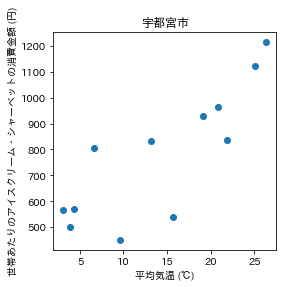

In [ ]:
x= [3.1, 4.3, 6.6, 13.2, 19.1, 20.9, 26.4, 25.1, 21.9, 15.7, 9.6, 3.8]
y= [568, 572, 804, 833, 930, 965, 1213, 1120, 835, 540, 451, 502]

plt.figure(figsize=(4,4)) 
plt.title("宇都宮市") ## 図にはタイトルをつけることができます
plt.xlabel("平均気温 (℃)") #軸ラベルの指定
plt.ylabel("世帯あたりのアイスクリーム・シャーベットの消費金額 (円)")
plt.scatter(x,y)
plt.show()
plt.close() 

相関係数などの情報を含んだもう少しかっこいい図を作ってみましょう。


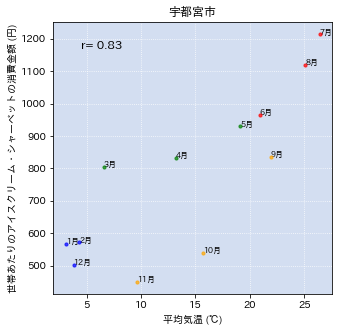

In [ ]:
x= [3.1, 4.3, 6.6, 13.2, 19.1, 20.9, 26.4, 25.1, 21.9, 15.7, 9.6, 3.8]
y= [568, 572, 804, 833, 930, 965, 1213, 1120, 835, 540, 451, 502]

x= np.array(x); y= np.array(y)## 注1　
r = np.corrcoef(x,y) ## x,yの配列間の相関行列を計算します 
corrcoef=r[0,1] ## 行列の非対角要素が相関係数です。 r[0,1] # 0行目1列の値

def seasoncolor(month): #季節ごとに適当に色を塗ってみましょう
    if month <= 2 or month ==12:
        return "blue"
    elif 3 <= month <=5:
        return "green"
    elif 6 <= month <=8:
        return "red"
    elif 9<= month <=11:
        return "orange"
    return tcol

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)  ## 注2
ax.set_facecolor("#D3DEF1")
ax.set_title("宇都宮市")
ax.set_xlabel("平均気温 (℃)")
ax.set_ylabel("世帯あたりのアイスクリーム・シャーベットの消費金額 (円)")
ax.grid(True,axis="both",color="w", linestyle="dotted", linewidth=0.8)
for i in range(len(x)):
    tcol=seasoncolor(i+1)
    ax.scatter(x[i],y[i],marker="o",s=10,color=tcol,zorder=20000,alpha=0.7)
    ax.text(x[i],y[i],str(i+1)+"月",color="k",fontsize=8)
ax.text(0.1,0.9, "r="+str("%5.2f" % corrcoef), transform=ax.transAxes,fontsize=12)
plt.show()
plt.close()

**注:**   x,yのデータをnumpy.array()を使ってndarray型に変換しました.  
今の場合はndarrayにする必要性は必ずしもないのですが、  
こうしておくといくつかの処理が高速・便利になります。  
**数値を格納したリストは常にnp.arrayに変換して使う**  
と、慣れるまでは考えてもよいかもしれません。  

たとえばx軸の気温を絶対温度(ケルビン)に直したい時、  
リストのままでは以下はエラーになります


In [ ]:
x= [3.1, 4.3, 6.6, 13.2, 19.1, 20.9, 26.4, 25.1, 21.9, 15.7, 9.6, 3.8]
print(x - 273.15 )

TypeError: ignored

ので、各要素に-273.15を加える必要がありますが、気温のリストをnp.arrayにしておけば

In [ ]:
print(np.array(x) -273.15)

[-270.05 -268.85 -266.55 -259.95 -254.05 -252.25 -246.75 -248.05 -251.25
 -257.45 -263.55 -269.35]


とするだけで、全ての要素に-273.15を加えたnp.arrayを返します。

これは、numpyに備わった「ブロードキャスト」と呼ばれる仕組みによるものです。

この機能によって、いちいち配列の次元数や形状を揃えなくても  
簡単に計算を記述することができます。

### $\clubsuit$ ```ax (matplotlib.axes) ```


上では、axという見慣れないものが導入されました。

キャンバスの上に小さな作業領域```axes```を指定するための  
```add_subplot```や```add_axes```といった関数があります。
```ax```はこれらの関数で生成される作業領域に慣例的に用いる変数です。

たとえばキャンバスを四分割して、  
似たようなグラフを4つ同時に描いたりするのに便利です。

```axes```を使いこなすのは少々テクニカルな点も多いので、  
よくわからない部分はとりあえず飛ばし読みで構いません。  
慣れてくると、その便利さに気がつくはずです。  

細かい図の書き方は追々、一緒に勉強していきましょう。

axに関しては、日本語で書かれた以下の記事もおすすめです  
https://qiita.com/skotaro/items/08dc0b8c5704c94eafb9

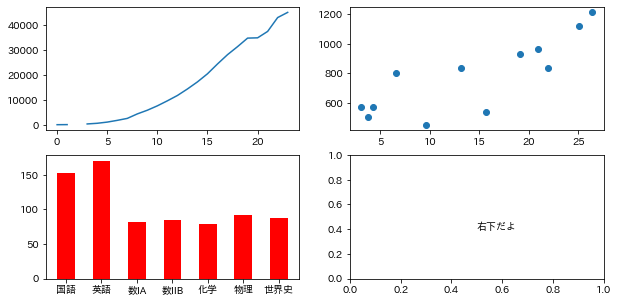

In [ ]:
fig = plt.figure(figsize=(10,5))
axTL= fig.add_subplot(2,2,1)  #TL: Top Leftのつもり
axTR = fig.add_subplot(2,2,2) #TR: Top Rightのつもり 
axBL = fig.add_subplot(2,2,3) #BL: Bottom Leftのつもり
axBR = fig.add_subplot(2,2,4) #BR: Bottom rightのつもり
axTL.plot(y_err)
axTR.scatter(x,y)
axBL.bar(label,data,align='center',width=0.5,color="red") 
axBR.text(0.5,0.4,"右下だよ")
plt.show()
plt.close()

### Google Driveのマウントと、Google Colab.上で作ったグラフの保存

プログラムを実行して絵を描けるようになったら、  
次にそれを保存して、レポートに貼り付けたり、  
誰かに送ったりする必要が出てくると思います。  

Google Colab.では、同じGoogleのサービスである  
Google drive上にファイルを保存したり(無料版で15GBまで)  
保存したファイルを他人と共有することができます。

皆さんのアカウントのGoogle Driveにあるファイルに  
Google Colab.からアクセスするためにはマウントという作業が必要です。

    






In [3]:
from google.colab import drive
drive.mount('/content/drive')  # ←のマウントする際の名前は好きに決められる。drive.mount('gdrive')とかでもOK

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


上のコードを実行すると(複数アカウントを所持している方はアカウントの選択をして)
ログインをクリックするとURLが出てきます。  

すると、**[このコードをコピーし、アプリケーションに切り替えて貼り付けてください]。**  
というメッセージが出ますので、  
Enter your authorization code:という欄にコードを貼り付けEnterを押します。

上のコードは「google driveをdriveという名前でマウントする」という操作を表しています。  
マウントできていれば、以下のコードを実行すると、  
皆さんのアカウントのマイドライブ直下のファイル一覧が表示されます。

In [ ]:
!ls ./drive/MyDrive

Google Colab.からは、!マークをつけることで  
LinuxやMac(Unix)同様のコマンドが使えます。  
上のlsというコマンドは(List Segmentsの略で)ファイルや  
ディレクトリの情報を表示するコマンドです。

半角のスラッシュ```/```はディレクトリ階層を意味していて、  
windowsで言うところの￥に相当します。

コンピュータでディレクトリやパスを指定するときは通常  
このような**パス**と呼ばれるものを指定して扱います。  
※パスについては5章のノートに詳しい記述があります。


次に、GoogleDriveに、図を保存する用のフォルダを作っておきましょう.  

mkdir(make directoryの略)コマンドで、  
マイドライブ直下に```Colab_pic```というディレクトリを作ることにします.

In [ ]:
!mkdir './drive/MyDrive/Colab_pic' 

上のコードを実行後にエラーが出ていなければ  
Google driveを開くとColab_picというディレクトリが作成されているかと思います。

一度フォルダを作ってしまうと、２回目以降は上のコードを実行しても  
「既にフォルダありますよ！！」というメッセージがでますので  
ノートを開くたびに実行する必要はありません。  


これで準備ができました。  
試しに以下のコードを実行して図を保存してみましょう。





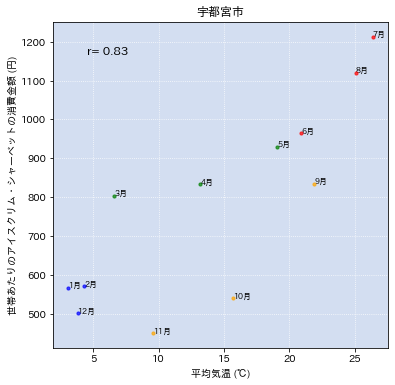

In [ ]:
### 先程の図
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)  
ax.set_facecolor("#D3DEF1")
ax.set_title("宇都宮市")
ax.set_xlabel("平均気温 (℃)")
ax.set_ylabel("世帯あたりのアイスクリム・シャーベットの消費金額 (円)")
ax.grid(True,axis="both",color="w", linestyle="dotted", linewidth=0.8)
for i in range(len(x)):
    tcol=seasoncolor(i+1)
    ax.scatter(x[i],y[i],marker="o",s=10,color=tcol,zorder=20000,alpha=0.7)
    ax.text(x[i],y[i],str(i+1)+"月",color="k",fontsize=8)
ax.text(0.1,0.9, "r="+str("%5.2f" % corrcoef), transform=ax.transAxes,fontsize=12)
plt.savefig("./drive/My Drive/Colab_pic/scatter_Utsunomiya_ice.pdf") #####  ここがさっきと違います！ 
#plt.show()
plt.close()

Google drive上の指定したフォルダに、ファイルが作られたでしょうか？  
matplotlibはファイル名を変えるだけで  
指定した拡張子で描画してくれるので色々試してみましょう  
(.jpg,.pdf,.eps,.pngなど)

**余談**

スライドに載せる画像は可能な限り、ラスタ形式ではなくベクタ形式(pdfやeps)がおすすめです。  
(それか、高解像度でjpegやpngを作ってスライドで使って、誰かにスライドを渡すときは軽量化する)  
プレゼンで図が滲んでいるスライドを見せていると「あぁ配慮が足りないんだな」と思われて損をしてしまうかもしれません。  
論文でラスタ画像を使う場合は「トンデモ論文だと思われて誰にも読まれない危険性」を理解して使いましょう。


**練習**
これまでの(棒グラフ,円グラフ,１次元図,散布図)のグラフを描画したコード部分で、  
データを自由に足してみながら、plt.show()を書き換えてファイルに出力してみましょう。








### gifアニメーションの作成

「なんだこの程度のグラフならExcelでも簡単にできるじゃん...」  
と思った皆さんのために、もう少し凝ったことをやってみましょう。  
gifアニメーション(パラパラ漫画)を作ってみます。  

以下のリンクに、x軸をGDP,y軸を24歳から35歳の平均就学年数の女性/男性比(%)とした  
グラフを画像ファイル(png)にしたものを公開しました。

(もともとのデータはFACTFULNESSから来ているのでライセンスフリーです)  
https://drive.google.com/drive/folders/1E0H1CP_r8kFJPqtq-_sYr1-PNl-BUAXp?usp=sharing


1.   まずこれをダウンロードしてください。
2.   ZIP形式で保存されるので、それを解凍してください
3.   解凍したフォルダを自身のGoogle Driveの好きな場所にアップロードしてください  
※以下のコードをそのまま使いたければ```AdDS2021```というディレクトリを作ってその下にアップロード




たとえば私のようにGoogle Driveのマイドライブ直下のAdDS2021というフォルダの下に  
GDPvsWomenInSchoolというフォルダを置いたとします

参考スクリーンショット:  
![](https://drive.google.com/uc?export=view&id=12v-XLgCHTpOehkJ2pmJIZ7zcaGIH4OZv)  



年代ごとに別々になったたくさんのグラフを、1つのパラパラ漫画にまとめてみましょう

先程のグラフがgoogle driveに保存されているかどうかは、  
以下のコマンドで確認できます(アップロードして直後はファイルが見つからないことがあります)

In [ ]:
!ls  ./drive/MyDrive/AdDS2021/GDPvsWomenInSchool/*.png

AdDS2021/GDPvsWomenInSchool/の部分は皆さんのフォルダ名に適宜変更してください.

pngファイルをまとめてgifにするコードは以下のとおりです。(処理にしばし時間がかかります)

In [ ]:
from PIL import Image
import glob

files = sorted(glob.glob('./drive/My Drive/AdDS2021/GDPvsWomenInSchool/GDPvsWomen*.png')) ##まとめたいpngをワイルドカードで指定
images = list(map(lambda file: Image.open(file), files))

oupf = './drive/My Drive/Colab_pic/GDPvsWomen.gif' ##出力名と保存場所を指定する
images[0].save(oupf, save_all=True, append_images=images[1:], duration=400, loop=0)

エラーが出なければおそらく変数```oupf```で指定した場所に、gifファイルが生成されていると思います。


私の作成例([ファイルへのリンク](https://drive.google.com/file/d/1Y4EkRP3U-aUcziBOoHyxuBZWbT7ZGL-k/view?usp=sharing))は以下のとおりです  

<img src="https://drive.google.com/uc?export=view&id=1Y4EkRP3U-aUcziBOoHyxuBZWbT7ZGL-k" width = 40%>



### $\clubsuit$おまけ

その他のグラフ

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d.axes3d import get_test_data
import os

X, Y, Z = get_test_data()
fig = plt.figure(figsize=(10,5))
ax = fig.gca(projection='3d')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("target function")
ax.view_init(elev=45)#上から見た角度を調整できる
ax.plot_surface(X, Y, Z,cmap=plt.cm.viridis)
plt.show()
plt.close()

二次元ヒストグラム

In [ ]:
import matplotlib.cm as cm
import numpy as np

mu1 = [ 3.0, 2.0]
cov1 = [ [1.0, 0.7],[0.7,1.0]]
numS = 50000

sample1 = np.random.multivariate_normal(mu1,cov1,numS)
x1, y1 = sample1.T

fig = plt.figure(figsize=(6,5))
ax1 = fig.add_subplot(111)
H1 = ax1.hist2d(x1,y1, bins=40, cmap=cm.jet)
ax1.scatter(mu1[0],mu1[1],color="k",marker="x")
ax1.set_title('sample1')
ax1.set_xlabel('x'); ax1.set_ylabel('y')
fig.colorbar(H1[3],ax=ax1)
plt.show()
plt.close()


日本地図

In [ ]:
!pip install japanmap
from japanmap import pref_names,pref_code,groups,picture
import matplotlib.pyplot as plt
from pylab import rcParams

In [ ]:
plt.figure(figsize=(6,6))
plt.imshow(picture({'栃木県': 'red', '群馬県': 'blue'}))

# LICENSE


Copyright (C) 2021 Sota Yoshida

[ライセンス:クリエイティブ・コモンズ 4.0 表示 (CC-BY 4.0)](https://creativecommons.org/licenses/by/4.0/deed.ja)